# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import seaborn as sns
%matplotlib inline
medical = pd.read_csv('insurance2.csv')

In [7]:
medical.shape

(1338, 8)

In [8]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [11]:
mean = np.mean(medical.charges)
mean

13270.422265141257

In [12]:
std = np.std(medical.charges)
std

12105.484975561605

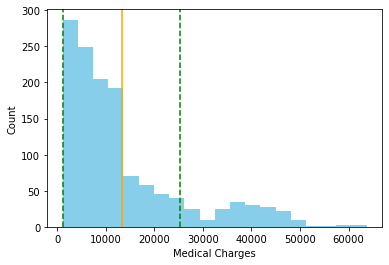

In [32]:
_= plt.hist(medical.charges,bins=20, color = 'skyblue')
_= plt.xlabel("Medical Charges")
_= plt.ylabel("Count")
_= plt.axvline(mean, linestyle='-', color='orange')
_= plt.axvline(mean-std, linestyle='--', color='g')
_= plt.axvline(mean+std, linestyle='--', color='g')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
    Null Hypothesis: The average charge has fallen below 12,000
    Alternative Hypothesis: The average charge did not fallen below 12,000
    Use Central Limit Theorem (CLT) to find the sampling ditribution of mean for given sample data, and use p_value to justify the hypothesis

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ 

- It is a one-sided interval
- Since dataset has 1338 samples which is relatively large. I will use z-test to calculate the confidence interval

In [50]:
mean, std

(13270.422265141257, 12105.484975561605)

In [39]:
z_value = 1.96
SE = std/np.sqrt(1338)
Margin_of_error_z = z_value * SE
Margin_of_error_z

648.6496792559246

In [40]:
CI_z = (mean-Margin_of_error_z, mean+Margin_of_error_z)
CI_z

(12621.772585885332, 13919.071944397181)

In [46]:
# However, the key criteria for z-test to be reliable need the dataset to be normally distributed.
# I will use CLT to analyze it again

In [48]:
sample_group = [np.mean(np.random.choice(medical.charges,100)) for i in range(10000)]

In [49]:
sample_mean = np.mean(sample_group)
sample_std = np.std(sample_group)
sample_mean, sample_std

(13277.470767686287, 1204.3943783680568)

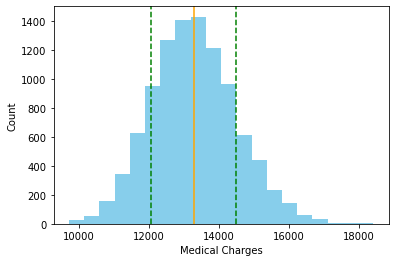

In [51]:
_= plt.hist(sample_group,bins=20, color = 'skyblue')
_= plt.xlabel("Medical Charges")
_= plt.ylabel("Count")
_= plt.axvline(sample_mean, linestyle='-', color='orange')
_= plt.axvline(sample_mean-sample_std, linestyle='--', color='g')
_= plt.axvline(sample_mean+sample_std, linestyle='--', color='g')

In [54]:
alpha = 0.025
df = 10000-1
p = 0.975
t_value = t.ppf(p, df)
t_value

1.9602012636213575

In [55]:
SE = sample_std/np.sqrt(10000)
SE

12.043943783680568

In [56]:
Margin_of_error_t = t_value* SE
Margin_of_error_t

23.608553823755244

In [57]:
CI_t = (mean-Margin_of_error_t, mean+Margin_of_error_t)
CI_t

(13246.813711317502, 13294.030818965011)

In [ ]:
# Neither of the analysis shows that the hospital should not be worried about its revenue.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Null Hypothesis : The people with or without insurance are charged a same amount 


Alternative Hypothesis : People with insurance are charged a different amount to people without insurance


Assumptions:

1. The scale of measurement applied to the data collected follows a continuous or ordinal scale
2. The data is collected from a representative, randomly selected portion of the total population.
3. Homogeneity of variance


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [74]:
medical.insuranceclaim.value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [75]:
with_insurance_charge = medical[medical.insuranceclaim==1].charges
without_insurance_charge = medical[medical.insuranceclaim==0].charges
len(with_insurance_charge), len(without_insurance_charge)

(783, 555)

In [76]:
# Performing manual calculation of t-statistic
n0 = len(without_insurance_charge)
m0 = np.mean(without_insurance_charge)
s0 = np.std(without_insurance_charge)

n1 = len(with_insurance_charge)
m1 = np.mean(with_insurance_charge)
s1 = np.std(with_insurance_charge)

In [77]:
sp = np.sqrt((((n0-1)*(s0**2)) + ((n1-1)*(s1**2))) / (n0+n1-2))
sp

11512.282899205744

In [78]:
t_statistics = (m0 - m1)/(sp * np.sqrt((1/n0) + (1/n1)))
t_statistics

-11.901306943555385

In [83]:
df = 1338-1
p = t.cdf(t_statistics, df)
print("p_value calculated manually is: ",p)

p_value calculated manually is:  2.040190074361098e-31


In [67]:
import scipy.stats as st

In [79]:
# Performing t-test using scipy stats
st.ttest_ind(with_insurance_charge, without_insurance_charge)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [84]:
print("p_value calculated by scipy stats is: ", st.ttest_ind(with_insurance_charge, without_insurance_charge)[1])

p_value calculated by scipy stats is:  4.461230231620717e-31


In [ ]:
# p-value from both method are small enought to reject the null hypothesis

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

No, I don't find a z-test function

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test